# TNSI - Séquence N°6 - Structures arborescentes
# TP N°1 - Implémentation objet des arbres binaires

Dans ce TP nous allons implémenter une classe permettant de représenter un arbre binaire. 

## Partie 1. Implémentation de la classe Noeud

On va pour cela créer un objet **Noeud** qui aura 3 attributs :
- La propriété **valeur** contiendra la valeur (ou étiquette) associée au noeud. 
- Les propriétés **gauche** et **droit** seront les sous arbres gauche et droit. 

Les deux propriétés **gauche** et **droit** seront  des instances de la classe **Noeud**. Si il n'y a pas de sous arbre gauche ou droit, on indiquera la valeur **None** dans les propriétés correspondantes.


Dans notre classe **Noeud**, nous créerons 3 méthodes :
- La méthode **est_feuille()** renverra un booléen selon que l'objet est une feuille ou non.
- La méthode **cree_fils_gauche()** prend en paramètre une valeur et crée une feuille à gauche dont la valeur est passée en paramètres.  De plus, elle retourne le noeud fils.
- La méthode **cree_fils_droite()** est construite sur le même modèle que **cree_fils_gauche()**. De plus, elle retourne le noeud fils.

In [1]:
class Noeud():
    
    # la méthode __repr__ définit ce qui sera affiché
    # lorsqu'on tapera l'objet dans Jupyter ou un terminal
    # Ici, on affiche juste la valeur du noeud
    
    
    def __repr__(self):
        return str(self.valeur)
    
    # Codez ici les méthodes demandées
    # YOUR CODE HERE
    
    def __init__(self,valeur):
        self.valeur = valeur
        self.gauche = None
        self.droit = None
    
    def cree_fils_gauche(self,sous_arbre):
        self.gauche = Noeud(sous_arbre)
        return self.gauche

    def cree_fils_droit(self,sous_arbre):
        self.droit = Noeud(sous_arbre)
        return self.droit
    
    def est_feuille(self):
        return self.gauche == None and self.droit == None

In [2]:
# Testez ici les méthodes de votre classe
a = Noeud(2)

### Exemple d'utilisation de la classe Noeud pour obtenir un arbre binaire

On souhaite réaliser l'arbre binaire suivant où `D` est un fils gauche.
![exemple1](./img/arbre1.png?dl=1)

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 1 </strong>
    
1. Saisir, dans la cellule ci-dessous, les instructions permettant d'implémenter l'arbre binaire ci-dessus.

    Le noeud racine sera un objet que l'on nommera `racine`.
    
2. Compléter les tests donnés ci-dessous afin de vérifier l'intégralité de l'arbre réalisé.
</div>

In [3]:
# Saisir ici les instructions permettant d'implémenter l'arbre ci-dessus.
racine = Noeud("A")
sous_arbre_gauche = racine.cree_fils_gauche("B")
sous_arbre_gauche.cree_fils_gauche("D")
racine.cree_fils_droit("C")

C

In [4]:
# Quelques tests pour vérifier votre travail.

assert racine.valeur == "A"
assert racine.droit.valeur == "C"
assert racine.gauche.valeur == "B"
assert racine.gauche.gauche.valeur == "D"

assert not racine.est_feuille()
assert racine.droit.est_feuille()
assert racine.gauche.gauche.est_feuille()


## Partie 2. Pour avoir un joli affichage de l'arbre et exemple

### a) Présentation de l'affichage avec graphviz

<div class="alert alert-warning" role="alert">  
    
Pour ce TP, nous allons utiliser la bibliothèque graphviz pour afficher de jolis arbres :) :).
    
Pour l'installer, voici les manipulations à réaliser :
    
- Télécharger le fichier suivant : https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/graphviz-2.44.1-win32.zip
- Décompréssez-le dans le dossier NSI de vos documents.
Nous allons ajouter les éxécutables de ce programme à votre `path`. 
- Appuyez sur la touche windows et cherchez `variables système`
- Cliquez sur variable d'environnement
- Dans la première partie `variables utilisateur ` cliquez sur **nouvelle**
- nom de la variable `Path` et valeur : le chemin d'accès vers le dossier `/bin` du dossier décompréssé .
- Fermez votre session puis rouvrez-la ou redémarrer l'ordinateur. Cela devrait normalement fonctionner.
- Pour terminer l'installation, depuis un terminal, exécution l'instruction `pip install graphviz`
</div>

In [5]:
# Validez cette cellule pour importer graphviz
# Ce module permet de dessiner des arbres et des graphes
from graphviz import Digraph

On peut compléter cette classe **Noeud** par une nouvelle classe décrivant un objet **ArbreBin**. Un arbre va contenir le **Noeud** racine ainsi que des méthodes permettant l'affichage de l'arbre ou appliquant des algorithmes sur cet arbre.

Nous verrons dans un prochain notebook des algorithmes sur cette classe. Néanmoins, pour vous donner un aperçu, voici une première ébauche de la classe **ArbreBin** qui nous sera utile pour visualiser facilement les arbres sur lesquels nous travaillerons.

In [6]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot

Voici ci-dessous un exemple d'utilisation avec l'arbre vu dans la partie précédente.

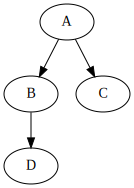

In [7]:
racine = Noeud("A")
sous_arbre_gauche = racine.cree_fils_gauche("B")
sous_arbre_gauche.cree_fils_gauche("D")
racine.cree_fils_droit("C")

arbre = ArbreBin(racine)
arbre.show()

### b) Exercice de synthèse

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 2 </strong>
    
Utiliser la classe **Noeud** et **Arbrebin** et les méthodes que vous avez développées pour représenter l'arbre suivant dans la variable `expr`.
    
Les opérations seront représentées par des chaînes de caractères. Les feuilles seront des entiers.
</div>

![expression](./img/expr.png)

In [8]:
# Saisir ici les instructions pour créer l'arbre

# hauteur 0
racine = Noeud("+")
# hauteur 1
sous_arbre_gauche = racine.cree_fils_gauche("-")
sous_arbre_droit = racine.cree_fils_droit(1)
# hauteur 2
fois = sous_arbre_gauche.cree_fils_gauche("*")
puissance = sous_arbre_gauche.cree_fils_droit("^")
# hauteur 3
fois.cree_fils_droit(2)
plus = fois.cree_fils_gauche("+")
puissance.cree_fils_droit(2)
puissance.cree_fils_gauche(3)
# hauteur 4
plus.cree_fils_gauche(2)
plus.cree_fils_droit(4)

expr = ArbreBin(racine)

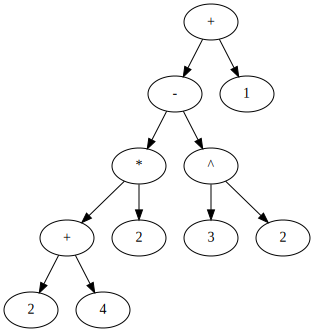

In [9]:
# Validation de la réponse et affichage de l'arbre
assert racine.valeur == "+"
assert racine.droit.valeur == 1

# Saisir ci-dessous l'instruction pour générer l'affichage de l'arbre.
expr.show()

**Question supplémentaire :** Compléter la cellule ci-dessous avec l'instruction permettant d'afficher le sous arbre gauche.  

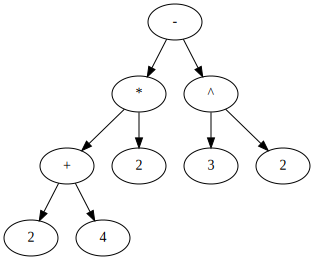

In [22]:
# Afficher le sous arbre gauche :
ArbreBin(racine.gauche).show()

## Partie 3. Pour les plus rapides
## Passer d'une implémentation avec des listes à une implémentation Objet

On souhaite réaliser pouvoir une fonction qui convertit un arbre binaire défini par des listes Python en implémentation orientée objet en utilisant la classe `Noeud`.

Par exemple, si on définit un arbre de la façon suivant : 

`arbre = ["A", ["B", ["D", [], []], []], ["C", [], []]]`.

La fonction recherchée devra créer l'objet `arbre` défini en POO de la façon suivante :

```Python
    arbre = Noeud("A")
    arbre.gauche = Noeud("B")
    arbre.droite = Noeud("C")
    arbre.gauche.gauche = Noeud("D") 
```




<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 3 </strong>
    
Ècrire le code d'une fonction `convertir` qui reçoit en paramètre un tableau modélisant un arbre binaire et qui renvoie un objet, instanciation de la classe `Noeud`, qui correspondant à une implémentation en POO de l'arbre binaire passé en paramètre.
</div>

In [23]:
def convertir(tableau):
    # Cas particuliers
    if tableau == []:
        return None
    elif len(tableau) == 1:
        return Noeud(tableau[0])
    else:
        nd = Noeud(tableau[0])
        nd.gauche = convertir(tableau[1])
        if len(tableau) >= 3:
            nd.droit  = convertir(tableau[2])
        else:
            nd.droit = None
        return nd

In [24]:
# Tester votre code ici avec l'arbre donné précédemment.
arbre_liste = ["A", ["B", ["D", [], []], []], ["C", [], []]]

# à toi de compléter :)
racine = convertir(arbre_liste)
arbre = ArbreBin(racine)

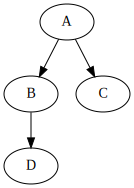

In [25]:
# à exécuter pour vérifier le bon fonctionnement.

arbre.show()

### Pour aller plus loin

On peut aussi intégrer cette fonction parmi les méthodes de la classe `ArbreBin` de la fonction suivante. La fonction `convertir` précédente a été placée dans une méthode `importer`. Cette fonction est appelée une **fonction locale** qui n'est visible que dans la méthode `importer`. La méthode `importer` est présente pour invoquer la fonction `convertir` sur la racine l'arbre. 

Cette méthode a l'avantage d'éviter de multiplier les méthodes dans la classe `ArbreBin`.

In [107]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def importer(self, tableau):
        """Fonction qui importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]] et où [] désigne un arbre vide"""
        def convertir(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            elif len(tableau) == 1:
                return Noeud(tableau[0])

            else:
                nd = Noeud(tableau[0])
                nd.gauche = convertir(tableau[1])
                if len(tableau) >= 3:
                    nd.droit  = convertir(tableau[2])
                else:
                    nd.droit = None
            return nd
        
        self.racine = convertir(tableau)

In [ ]:
arbre_liste = ["A", ["B", ["D", [], []], []], ["C", [], []]]
arbre = ArbreBin(None)
arbre.importer(arbre_liste)
arbre.show()
# Exécuter ces lignes pour vérifier le bon fonctionnement